## Lab 2 - Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

Nathan Garrity (Student number: 8767594)

### **Introduction** (Part 1 Question 2)

#### Framing the Problem

The goal is to predict the progression of diabetes one year after baseline based on 10 baseline variables (features). I will be using features like BMI, and eventually the rest to determine if they can be used to help physicians with identifying patients at risk.

**Dependent Variable (Target):**

target: Quantitative measure of disease progression one year after baseline.

**Independent Variables (Features):**

age, sex, bmi, bp, s1 (Total serum cholesterol), s2 (Low-density lipoproteins), s3 (High-density lipoproteins), s4 (Total cholesterol / HDL), s5 (LDL / HDL), s6 (BMI * Age)

### **Data Exploration** (Part 1 Question 3)

##### Dataset (Source: [7.1.2. Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset))

The dataset contains 10 columns and 442 unique entries, providing us a substantial data range. The data covers diabetes variables such as age, sex, body mass index, average blood pressure, and six blood serum measurements that were obtained for 442 diabetes patients.

Column Names:
* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

In [562]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Get the Data:

In [563]:
# Part 1 Question 1
from sklearn import datasets
import pandas as pd

# Gets the data
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes.frame


df.head(442)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [564]:
# Display summary statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


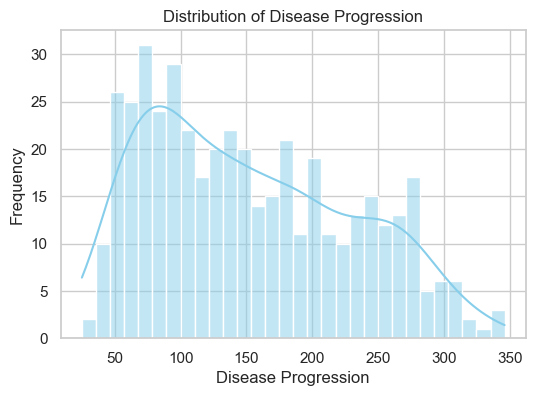

In [565]:
# Distribution graph for disease progression
plt.figure(figsize=(6, 4))
sns.histplot(df['target'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Disease Progression')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

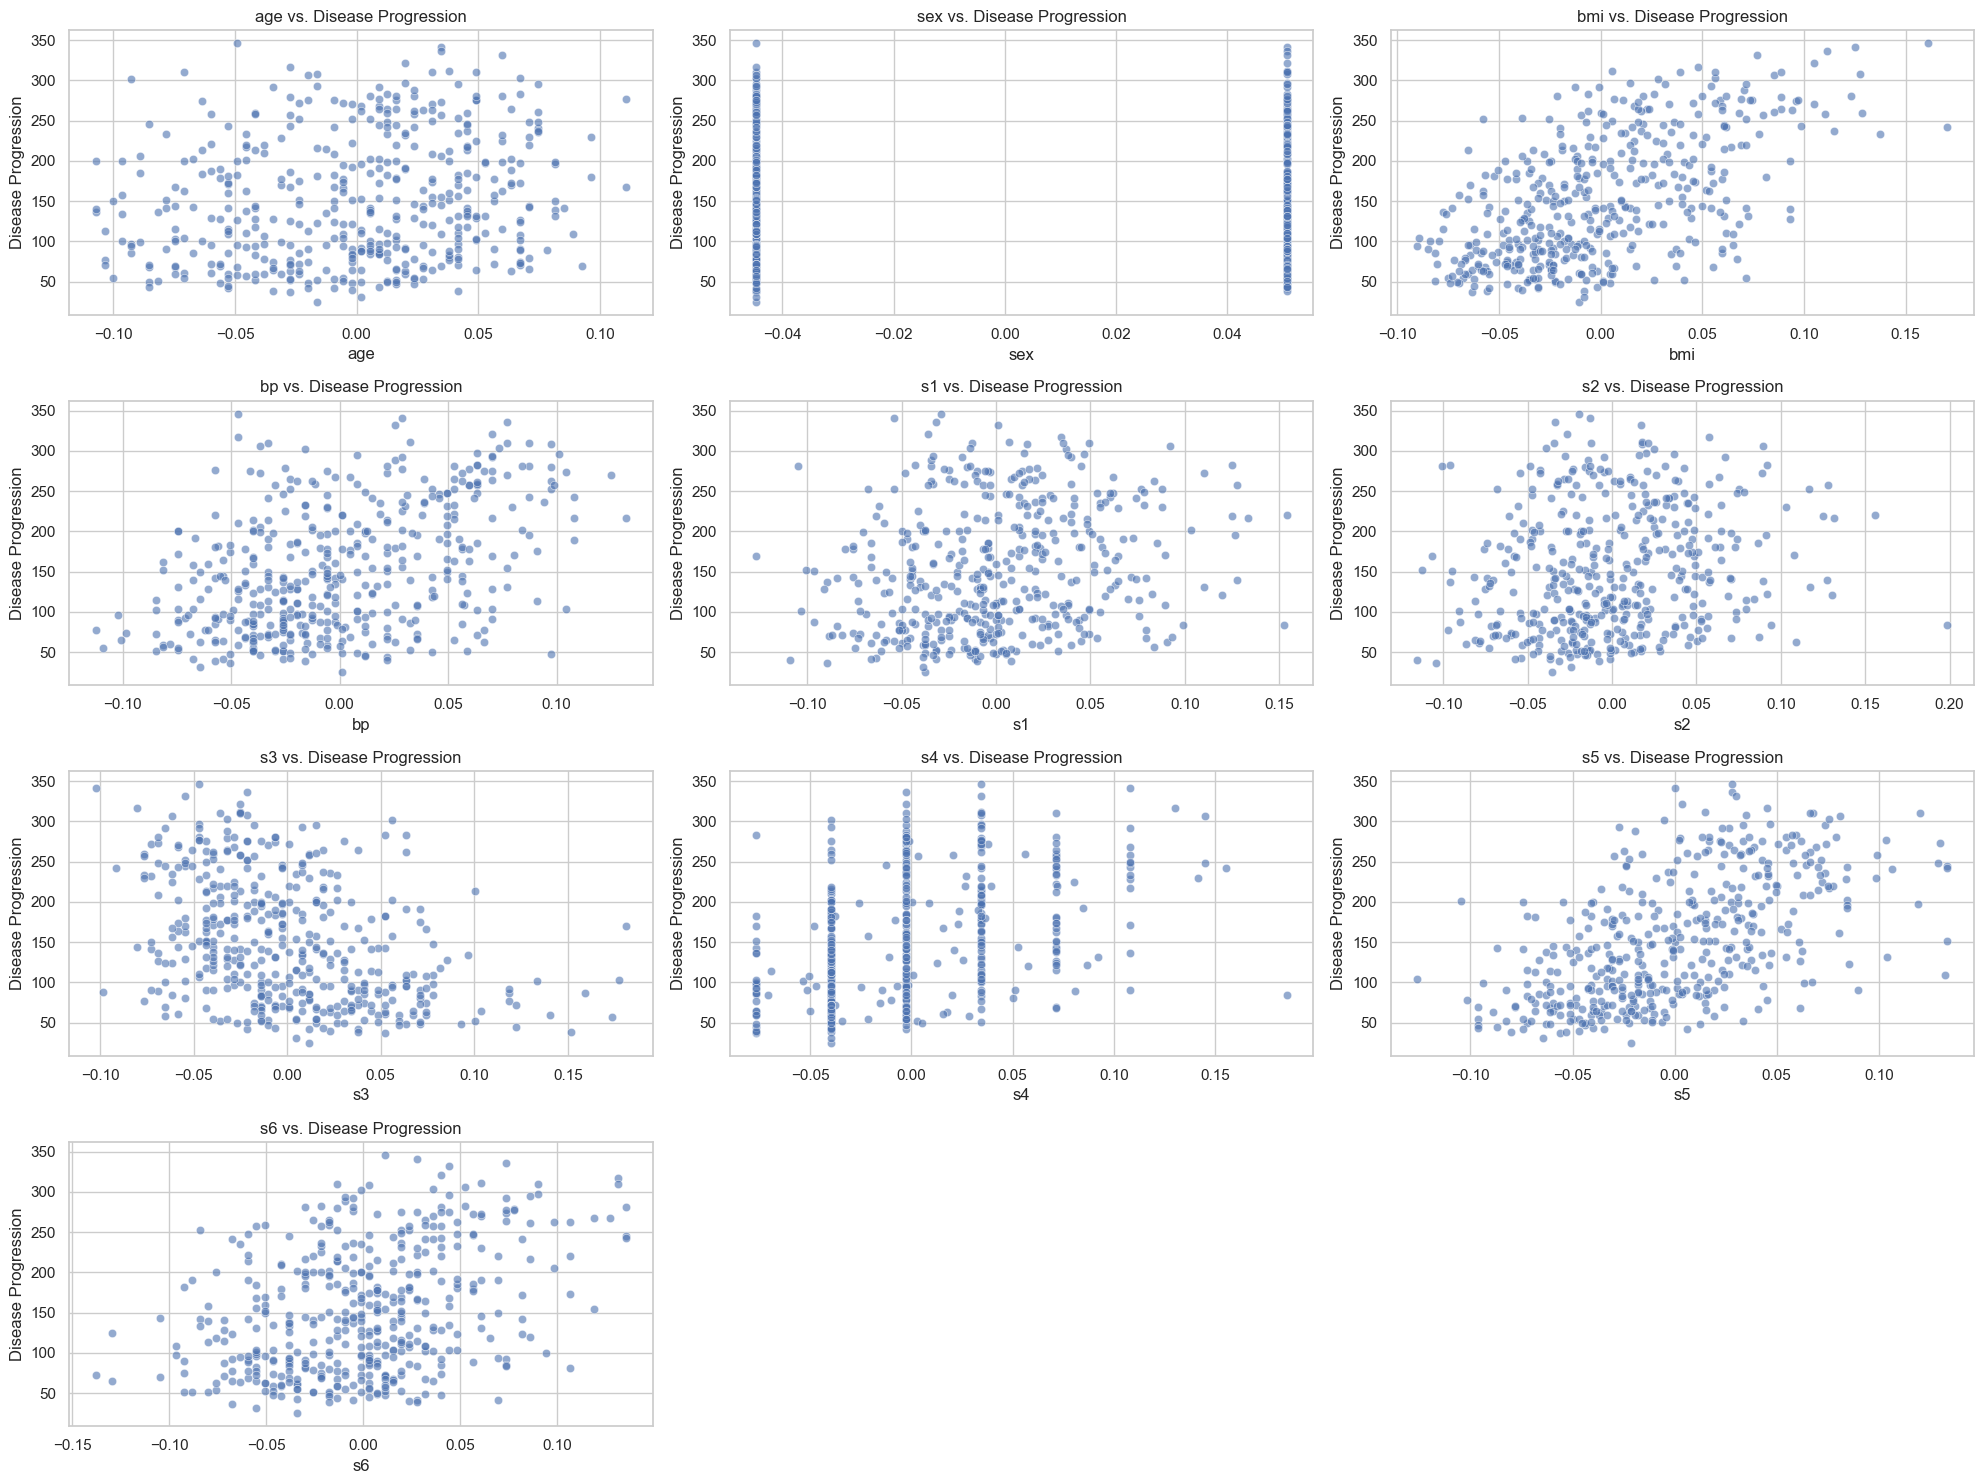

In [566]:
# Array holding a list of features
features = diabetes.feature_names

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[feature], y=df['target'], alpha=0.6)
    plt.title(f'{feature} vs. Disease Progression')
    plt.xlabel(feature)
    plt.ylabel('Disease Progression')

plt.tight_layout()
plt.show()

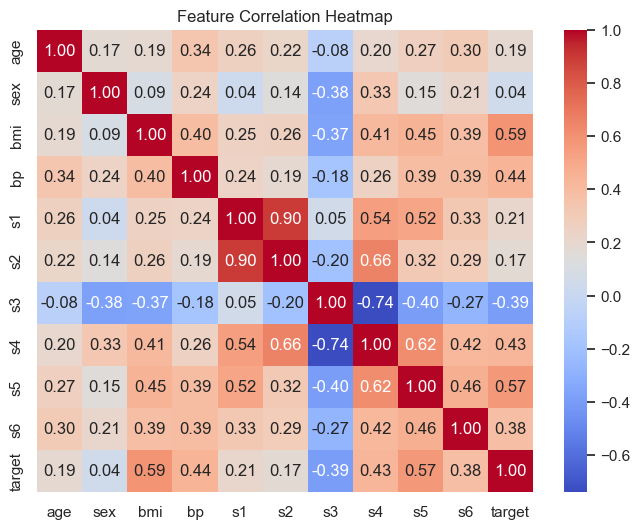

In [567]:
# Heatmap for feature correlation
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

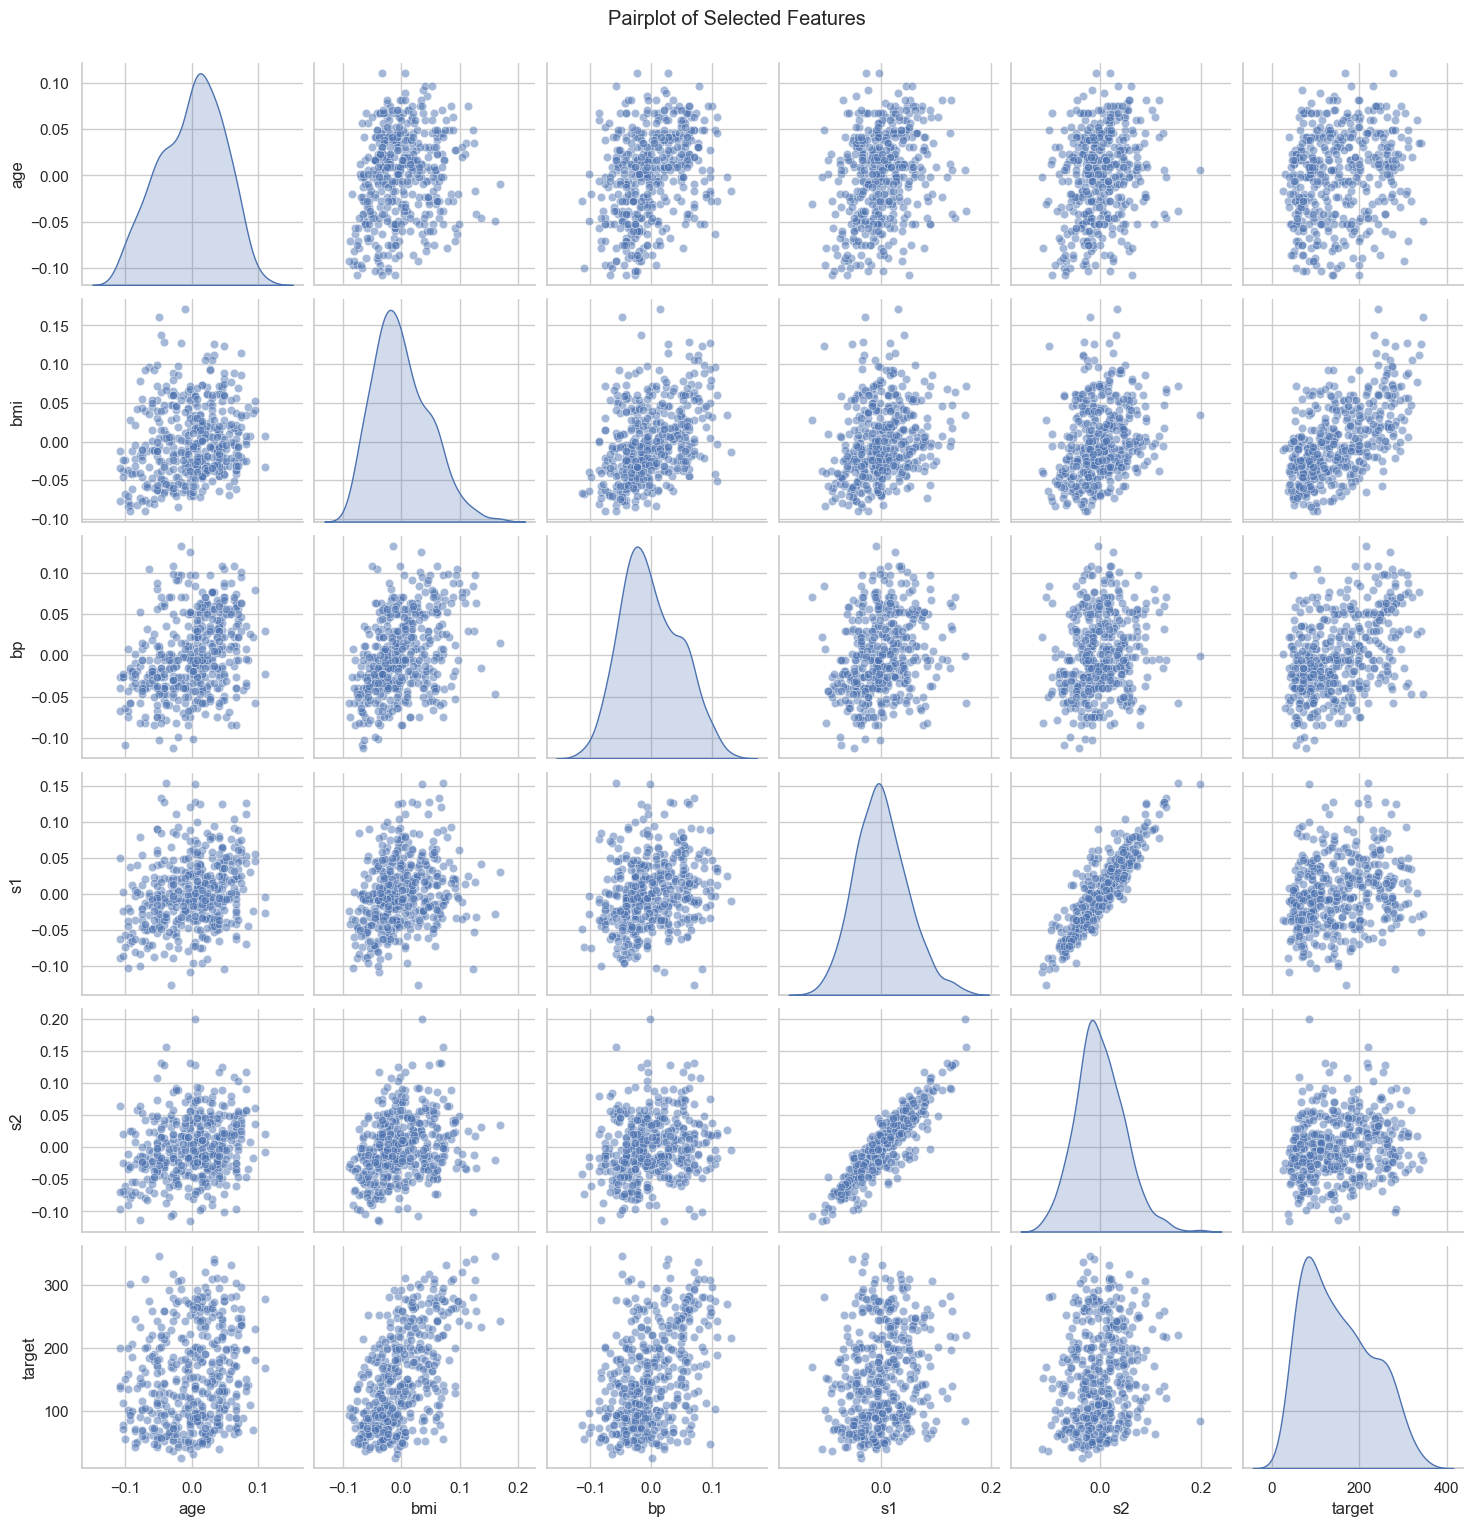

In [568]:
# Pairplot for features
selected_features = ['age', 'bmi', 'bp', 's1', 's2', 'target']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### **Data Preprocessing**

In [569]:
# Part 1 Question 4
# Check and display for any missing values
missing_values = df.isnull().sum()
print(missing_values)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [570]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Considering there are no missing values or duplicate rows, there is nothing notable required to clean up in the dataset, so I will continue with the dataset as is.

### **Modeling**

In [571]:
# Part 1 Question 5 - Splitting the dataset to a train (75%), validation set (10%), and test set (15%)
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# First, split into training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Then, split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.6, random_state=42
)

# Display the finalized shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (331, 10), (331,)
Validation set: (44, 10), (44,)
Test set: (67, 10), (67,)


## Part 2
### 6.  Creating 6 models: univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5

In [572]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Select BMI feature and target
X_bmi_train = X_train[['bmi']]
X_bmi_val = X_val[['bmi']]
X_bmi_test = X_test[['bmi']]

# Function to fit polynomial regression models
def fit_polynomial(degree, X_train, y_train, X_val, y_val):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    return model, (r2_train, mae_train, mape_train), (r2_val, mae_val, mape_val)

# Fit models for degree 0 to 5
results = {}
for degree in range(6):
    model, train_metrics, val_metrics = fit_polynomial(degree, X_bmi_train, y_train, X_bmi_val, y_val)
    results[degree] = {"model": model, "train": train_metrics, "val": val_metrics}

# Display results
print(results)

{0: {'model': LinearRegression(), 'train': (0.0, np.float64(66.20164109491516), np.float64(62.82666949166479)), 'val': (-0.10695658646940309, np.float64(66.05705850041198), np.float64(71.26388036481318))}, 1: {'model': LinearRegression(), 'train': (0.34967185121455036, np.float64(52.28773945157054), np.float64(48.3628861563456)), 'val': (0.33126358919280885, np.float64(47.20847217273694), np.float64(47.060009012494426))}, 2: {'model': LinearRegression(), 'train': (0.3507638912961787, np.float64(52.20731378788719), np.float64(48.298534457931424)), 'val': (0.33163059113292626, np.float64(47.21369996491131), np.float64(47.23966741140025))}, 3: {'model': LinearRegression(), 'train': (0.3507739717064434, np.float64(52.19896750707646), np.float64(48.28074375642864)), 'val': (0.3316375420464187, np.float64(47.185413892618996), np.float64(47.222673165700854))}, 4: {'model': LinearRegression(), 'train': (0.3530137354946927, np.float64(52.09265315815546), np.float64(48.053266051672736)), 'val': 

### 7. Comparing the models using the training and validation data and creating a table summarizing the train validation results

In [573]:
import pandas as pd

# Prepare the results table where each row is one of the 0-5 degree model
results_table = pd.DataFrame({
    "Degree": [0, 1, 2, 3, 4, 5],
    "R-Squared (training)": [results[d]['train'][0] for d in range(6)],
    "R-Squared (Validation)": [results[d]['val'][0] for d in range(6)],
    "MAE (training)": [results[d]['train'][1] for d in range(6)],
    "MAE (Validation)": [results[d]['val'][1] for d in range(6)],
    "MAPE (training)": [results[d]['train'][2] for d in range(6)],
    "MAPE (Validation)": [results[d]['val'][2] for d in range(6)],
})

# Display the results table
results_table

,Degree,R-Squared (training),R-Squared (Validation),MAE (training),MAE (Validation),MAPE (training),MAPE (Validation)
0,0,0.000000,-0.106957,66.201641,66.057059,62.826669,71.263880
1,1,0.349672,0.331264,52.287739,47.208472,48.362886,47.060009
2,2,0.350764,0.331631,52.207314,47.213700,48.298534,47.239667
3,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673
4,4,0.353014,0.340758,52.092653,46.090118,48.053266,46.050330
5,5,0.354100,0.349881,52.059191,45.462121,48.004022,45.175275


### 8. Identify the best model based on the table above

In [574]:
# Sort by R-Squared (Val) and MAE (Val) to identify the best model
best_model = results_table.sort_values(by=['R-Squared (Validation)', 'MAE (Validation)'], ascending=[False, True]).iloc[0]
best_degree = best_model['Degree']
best_degree

np.float64(5.0)

My determined best model is model 6, which is the model with degree 5. It offers the highest R-Squared value and the lowest MAE and MAPE on the validation set, indicating better performance and good generalization to unseen data compared to the other degree models.

### 9. Testing for the Best Model (R-Squared, MAPE, MAE)

In [575]:
# Convert best_degree to int since its a float
best_degree = int(best_degree)

# Testing the best model on the test set
best_model = results[best_degree]['model']
X_bmi_test_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_bmi_test)
y_test_pred = best_model.predict(X_bmi_test_poly)

# get values of the testing metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"R-Squared test: {r2_test}") 
print(f"MAPE test: {mape_test}") 
print(f"MAE test: {mae_test}") 

R-Squared test: 0.26669658449530775
MAPE test: 43.02671323305442
MAE test: 51.75025709277397


### 10. Graphing the train, validation and test data points, and the fit of the degree 5 model over the rest

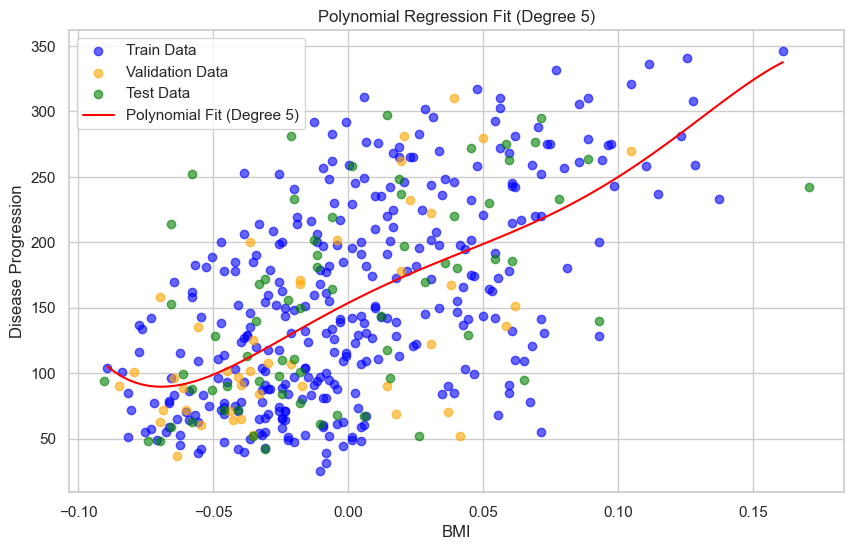

In [576]:
plt.figure(figsize=(10, 6))

# Training data
plt.scatter(X_bmi_train, y_train, color='blue', label='Train Data', alpha=0.6)

# Validation data
plt.scatter(X_bmi_val, y_val, color='orange', label='Validation Data', alpha=0.6)

# Test data
plt.scatter(X_bmi_test, y_test, color='green', label='Test Data', alpha=0.6)

# Best model curve
bmi_range = np.linspace(X_bmi_train.min(), X_bmi_train.max(), 100).reshape(-1, 1)
bmi_poly = PolynomialFeatures(degree=best_degree).fit_transform(bmi_range)
predictions = best_model.predict(bmi_poly)
plt.plot(bmi_range, predictions, color='red', label=f'Polynomial Fit (Degree {best_degree})')

plt.title(f'Polynomial Regression Fit (Degree {best_degree})')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

### 11. Write the equation of the best model

In [577]:
# Get coefficients, and intercept of the polynomial equation from the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

# Equation:
equation = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients[1:], 1):
    equation += f"+ {coef:.2f}*x^{i} "

equation

'y = 153.65 + 1059.89*x^1 + -3824.15*x^2 + -16770.23*x^3 + 753722.52*x^4 + -2993716.57*x^5 '

### 12. Calculating the expected diabetes progression for a BMI value of 0.05.

In [578]:
# My chosen BMI value set to 0.05
bmi_value = 0.05
bmi_poly_value = PolynomialFeatures(degree=best_degree).fit_transform([[bmi_value]])

# Predict using the best model
predicted_progression = best_model.predict(bmi_poly_value)
print(f"Expected diabetes progession: {predicted_progression}")

Expected diabetes progession: [198.76775129]


The expected diabetes progession of 198.77 would indicate that for a person with a BMI of 0.05, the model predicts their diabetes progression would increase by 198.77 units. This progression number would suggest a notable increase in the severity of diabetes over the course of the year.

### 13. Checking how many trainable parameters are fitted in each of the models

In [579]:
degrees = [0, 1, 2, 3, 4, 5]
X_bmi = X_bmi_train.iloc[:1]

# For loop to output each trainable parameters for each model
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_bmi) 
    feature_names = poly.get_feature_names_out(['bmi'])
    num_parameters = len(feature_names)
    print(f"Degree {degree}: {num_parameters} trainable parameters ({feature_names})")

Degree 0: 1 trainable parameters (['1'])
Degree 1: 2 trainable parameters (['1' 'bmi'])
Degree 2: 3 trainable parameters (['1' 'bmi' 'bmi^2'])
Degree 3: 4 trainable parameters (['1' 'bmi' 'bmi^2' 'bmi^3'])
Degree 4: 5 trainable parameters (['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4'])
Degree 5: 6 trainable parameters (['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5'])


Values explanation:

Intercept (or 1): A constant term included in every model (degree 0 and higher).

bmi, bmi^2, bmi^3, bmi^4, bmi^5: these are polynomial terms for the BMI feature. As the degree increases, higher-order terms are included in the model.

The number of trainable parameters in the models increase with the degree of the polynomial due to each degree adding a new term to the equation

In [580]:
y_min = y_train.min()
y_max = y_train.max()
target_range = y_max - y_min
print(f"Target Range: {target_range}")

Target Range: 321.0


## Conclusion
### 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance. (1 point).

Model Summary:

In this analysis I used univariate polynomial regression to predict diabetes progression over the course of one year based on the BMI feature. I developed models ranging from degree 0 to 5, and found that degree 5 was the best model based on having the highest R-Squared value and the lowest MAE and MAPE on the validation set. The model preforms alright, however has some downsides in preformance. MAE being 51.75 tells us that the model is not too bad, as when we divide it with the target range we can determine that there is an error of around 16% in that range (51.75 / 321 = 16%).

MAE, MAPE, R-Squared with the best model:
* Mean Absolute Error (MAE): 51.75
* Mean Absolute Percentage Error (MAPE): 43.03%
* R-squared: 0.27

Model Failures:

* A MAPE being 43.03% means that the univariate polynomial regression model’s predictions are 43% off from the actual value, which his is relatively high.
* R-Squared is releitively low, indicating a poor fit of the model to the data, or maybe more-so that this model is too simple for the complexity of the data
* The model uses a single feature being BMI to predict disease progression over a year. This simplification ignores notable contributing factors such as age, gender, cholesterol levels, and blood pressure.

Model Limitations:

* Polynomial regression can be sensitive to outliers, which can affect the fit and skew the results. This is fairly relevant in health-related datasets such as this one where we are using diabetes where extreme values can exist.
* This model may also overfit for higher polynomial degrees.

## Part 3

### Polynomial Regression Models

In [581]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# set degrees for the 2 polynomial models
degrees = [2, 3]
poly_results = {}

for degree in degrees:
    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    # Store results
    poly_results[degree] = {"model": model, "train": (r2_train, mae_train, mape_train), "val": (r2_val, mae_val, mape_val)}

print(poly_results)

{2: {'model': LinearRegression(), 'train': (-1.2307233493103689, np.float64(90.77341389728096), np.float64(78.12864146270093)), 'val': (-1.6776598131668905, np.float64(90.06818181818181), np.float64(95.49328511984373))}, 3: {'model': LinearRegression(), 'train': (0.6079440860308705, np.float64(38.46525679758308), np.float64(32.09027506239139)), 'val': (-45.14248002776627, np.float64(243.5681818181818), np.float64(216.4802017137428))}}


In [582]:
results_table_multivariate = pd.DataFrame({
    "Degree": [2, 3],
    "R-Squared (Train)": [results_multivariate[d]['train'][0] for d in [2, 3]],
    "R-Squared (Val)": [results_multivariate[d]['val'][0] for d in [2, 3]],
    "MAE (Train)": [results_multivariate[d]['train'][1] for d in [2, 3]],
    "MAE (Val)": [results_multivariate[d]['val'][1] for d in [2, 3]],
    "MAPE (Train)": [results_multivariate[d]['train'][2] for d in [2, 3]],
    "MAPE (Val)": [results_multivariate[d]['val'][2] for d in [2, 3]],
})

# Display the results table
results_table_multivariate

,Degree,R-Squared (Train),R-Squared (Val),MAE (Train),MAE (Val),MAPE (Train),MAPE (Val)
0,2,-1.230723,-1.67766,90.773414,90.068182,78.128641,95.493285
1,3,0.607944,-45.14248,38.465257,243.568182,32.090275,216.480202


In [583]:
# Sort by R-Squared (Val) and MAE (Val) to identify the best model
best_model_multivariate = results_table_multivariate.sort_values(by=['R-Squared (Val)', 'MAE (Val)'], ascending=[False, True]).iloc[0]
best_degree_multivariate = int(best_model_multivariate['Degree'])
print(best_degree_multivariate)

2


Model 1 with degree of 2 is the best model in this case as the R-squared value is higher and the MAE value is lower than the other model

In [584]:
best_model_multivariate = results_multivariate[best_degree_multivariate]['model']
X_test_poly = PolynomialFeatures(degree=best_degree_multivariate).fit_transform(X_test)
y_test_pred = best_model_multivariate.predict(X_test_poly)

# get values of the testing metrics
r2_test_multivariate = r2_score(y_test, y_test_pred)
mae_test_multivariate = mean_absolute_error(y_test, y_test_pred)
mape_test_multivariate = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"R-Squared test: {r2_test_multivariate}") 
print(f"MAPE test: {mape_test_multivariate}") 
print(f"MAE test: {mae_test_multivariate}") 

R-Squared test: -2.4905087325715254
MAPE test: 82.73800819409348
MAE test: 102.05970149253731


In [585]:
# Gets the coefficients and intercept of the polynomial equation for the best model
coefficients_multivariate = best_model_multivariate.coef_
intercept_multivariate = best_model_multivariate.intercept_

# Extracts the feature names
poly = PolynomialFeatures(degree=best_degree_multivariate)
poly.fit(X_train)
feature_names_multivariate = poly.get_feature_names_out(input_features=X_train.columns)

# Combines the feature names with coefficients for equation
equation_multivariate = f"y = {intercept_multivariate:.2f} "
for i, coef in enumerate(coefficients_multivariate[1:], 1):
    equation_multivariate += f"+ {coef:.2f} * {feature_names_multivariate[i]} "

print(equation_multivariate)

y = -116706524068140784.00 + 107.70 * age + -508.67 * sex + 426.52 * bmi + 692.60 * bp + 10742.17 * s1 + -11060.25 * s2 + -2752.34 * s3 + 2955.71 * s4 + -3562.01 * s5 + -0.88 * s6 + -3461.21 * age^2 + 9441.05 * age sex + -2899.10 * age bmi + 5093.18 * age bp + -52784.18 * age s1 + 63246.56 * age s2 + 33399.50 * age s3 + 8201.47 * age s4 + 8321.91 * age s5 + -18210.44 * age s6 + -3.07 * sex^2 + 4473.83 * sex bmi + -18816.04 * sex bp + 37633.10 * sex s1 + -32898.85 * sex s2 + -7912.67 * sex s3 + -6723.19 * sex s4 + -1038.00 * sex s5 + 13787.66 * sex s6 + 859.82 * bmi^2 + -2334.35 * bmi bp + 29063.88 * bmi s1 + -31914.86 * bmi s2 + -15724.54 * bmi s3 + -1906.75 * bmi s4 + -4409.92 * bmi s5 + 25010.36 * bmi s6 + -9507.07 * bp^2 + 19306.74 * bp s1 + -7692.82 * bp s2 + -11744.69 * bp s3 + 8345.12 * bp s4 + -21223.69 * bp s5 + -8065.74 * bp s6 + 95199.43 * s1^2 + -142741.04 * s1 s2 + -138503.63 * s1 s3 + 17851.91 * s1 s4 + -168966.37 * s1 s5 + -5049.14 * s1 s6 + 53028.32 * s2^2 + 113657.04 * 

### Conclusion and Model Limitations
Model Summary:

In this analysis I used polynomial model to predict diabetes progression over the course of one year based on all features in the dataset. I developed models ranging from degree 2 to 3, and found that degree 2 was the best model based on having the highest R-Squared value and the lowest MAE and MAPE on the validation set. This model ended up preforming quite poorly compared to the univariate polynomial regression model.

MAE, MAPE, R-Squared with the best model:
* Mean Absolute Error (MAE): 102.06
* Mean Absolute Percentage Error (MAPE): 82.74%
* R-squared: -2.49

Model Failures:

* The model has a fairly high MAE, indicating that the models predictions are not very close to the actual values
* The model has a MAPE of 82.74%, which is fairly high and indicates that there are errors with the models predictions
* The R-squared value being -2.49 is out of the ordinary as R-square values should range from 0 to 1 for good models. An R-squared value below 0 (like the one for this model being -2.49) suggests that the model is performing worse than a simple mean-based prediction model.

Model Limitations:

* If the degree of the polynomial is too low, the model may be too simple to capture the underlying relationships in the data, resulting in underfitting.

### Decision Tree Models

In [586]:
from sklearn.tree import DecisionTreeRegressor

# Sets 2 Decision tree models with different max_depths
max_depths = [3, 5]
dt_results = {}

for depth in max_depths:
    # Initializes and fits the model
    dt_model = DecisionTreeRegressor(max_depth=depth)
    dt_model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = dt_model.predict(X_train)
    y_val_pred = dt_model.predict(X_val)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    dt_results[depth] = {"model": dt_model, "train": (r2_train, mae_train, mape_train), "val": (r2_val, mae_val, mape_val)}

print(dt_results)

{3: {'model': DecisionTreeRegressor(max_depth=3), 'train': (0.5095025444869563, np.float64(44.25985495355638), np.float64(38.86659196381194)), 'val': (0.19830582865255408, np.float64(48.12624849350856), np.float64(47.67289713964773))}, 5: {'model': DecisionTreeRegressor(max_depth=5), 'train': (0.6866927308225991, np.float64(33.5270284885342), np.float64(29.973624689610723)), 'val': (0.025248467519162432, np.float64(52.03184683442259), np.float64(49.352836753658266))}}


In [587]:
results_table_trees = pd.DataFrame({
    "Max Depth": [3, 5],
    "R-Squared (Train)": [dt_results[depth]['train'][0] for depth in [3, 5]],
    "R-Squared (Val)": [dt_results[depth]['val'][0] for depth in [3, 5]],
    "MAE (Train)": [dt_results[depth]['train'][1] for depth in [3, 5]],
    "MAE (Val)": [dt_results[depth]['val'][1] for depth in [3, 5]],
    "MAPE (Train)": [dt_results[depth]['train'][2] for depth in [3, 5]],
    "MAPE (Val)": [dt_results[depth]['val'][2] for depth in [3, 5]],
})

# Displays the results table
results_table_trees

,Max Depth,R-Squared (Train),R-Squared (Val),MAE (Train),MAE (Val),MAPE (Train),MAPE (Val)
0,3,0.509503,0.198306,44.259855,48.126248,38.866592,47.672897
1,5,0.686693,0.025248,33.527028,52.031847,29.973625,49.352837


In [588]:
best_tree_model = results_table_trees.sort_values(by=['R-Squared (Val)', 'MAE (Val)'], ascending=[False, True]).iloc[0]
best_depth = int(best_tree_model['Max Depth'])
best_depth

3

In [589]:
best_dt_model = dt_results[best_depth]['model']

# Test metrics
y_test_pred = best_dt_model.predict(X_test)
dt_r2_test = r2_score(y_test, y_test_pred)
dt_mae_test = mean_absolute_error(y_test, y_test_pred)
dt_mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"R-Squared test: {dt_r2_test}") 
print(f"MAPE test: {dt_mape_test}") 
print(f"MAE test: {dt_mae_test}") 

R-Squared test: 0.4384437693731785
MAPE test: 40.17604727952344
MAE test: 46.11536783021465


### Conclusion and Model Limitations
Model Summary:

In this analysis I used a decision trees model to predict diabetes progression over the course of one year based on all features in the dataset. I developed models at max depths of 3 and 5, and found that a max depth of 3 was the best model based on having the highest R-Squared value and the lowest MAE and MAPE on the validation set. This model ended up preforming decently compared to the other models. The MAE being 46.12 for the data indicates that the predictions are only off by about 14% of the target range (46.12 / 321 = 14%).

MAE, MAPE, R-Squared with the best model:
* Mean Absolute Error (MAE): 46.12
* Mean Absolute Percentage Error (MAPE): 40.18%
* R-squared: 0.44

Model Failures:

* The model has a MAPE of 40.18%, which suggests that the model is making fairly large percentage errors in it's predictions.

Model Limitations:

* Decision tree models are prone to overfitting, especially if the tree depth is not appropriately controlled. A small max_depth might underfit the data.
* Another limitation is that decision trees are less interpretable compared to the polynomial regression model, as they do not provide a straightforward equation to describe the relationship between features and the target.

### k-Nearest Neighbors (kNN) Models

In [590]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Function to fit kNN models
def fit_knn(k, X_train, y_train, X_val, y_val):
    # Initialize and fit the kNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    return knn, (r2_train, mae_train, mape_train), (r2_val, mae_val, mape_val)

# Fit two kNN models with different k values
knn_results = {}
for k in [3, 5]:
    knn_model, train_metrics, val_metrics = fit_knn(k, X_train, y_train, X_val, y_val)
    knn_results[k] = {"model": knn_model, "train": train_metrics, "val": val_metrics}

print(knn_results)

{3: {'model': KNeighborsRegressor(n_neighbors=3), 'train': (0.6292997451197401, np.float64(37.13796576032226), np.float64(31.59741951840987)), 'val': (0.21418443779270424, np.float64(45.79545454545455), np.float64(44.24214381593004))}, 5: {'model': KNeighborsRegressor(), 'train': (0.5707614150639839, np.float64(40.77341389728097), np.float64(34.97685417036221)), 'val': (0.35848074609729985, np.float64(43.29090909090908), np.float64(41.24406299141674))}}


In [591]:
results_table_knn = pd.DataFrame({
    "k": [3, 5],
    "R-Squared (Train)": [knn_results[k]['train'][0] for k in [3, 5]],
    "R-Squared (Val)": [knn_results[k]['val'][0] for k in [3, 5]],
    "MAE (Train)": [knn_results[k]['train'][1] for k in [3, 5]],
    "MAE (Val)": [knn_results[k]['val'][1] for k in [3, 5]],
    "MAPE (Train)": [knn_results[k]['train'][2] for k in [3, 5]],
    "MAPE (Val)": [knn_results[k]['val'][2] for k in [3, 5]],
})

# Display the results table
results_table_knn

,k,R-Squared (Train),R-Squared (Val),MAE (Train),MAE (Val),MAPE (Train),MAPE (Val)
0,3,0.629300,0.214184,37.137966,45.795455,31.597420,44.242144
1,5,0.570761,0.358481,40.773414,43.290909,34.976854,41.244063


In [592]:
# Sort by the R-Squared (Val) and MAE (Val) to identify the best kNN model
best_knn_model = results_table_knn.sort_values(by=['R-Squared (Val)', 'MAE (Val)'], ascending=[False, True]).iloc[0]
best_k = int(best_knn_model['k'])
best_k

5

In [593]:
# Test the best kNN model on the test set
best_knn_model = knn_results[best_k]['model']
y_test_pred_knn = best_knn_model.predict(X_test)

r2_test_knn = r2_score(y_test, y_test_pred_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
mape_test_knn = np.mean(np.abs((y_test - y_test_pred_knn) / y_test)) * 100

print(f"R-Squared test: {r2_test_knn}") 
print(f"MAPE test: {mape_test_knn}") 
print(f"MAE test: {mae_test_knn}") 

R-Squared test: 0.47651971856469033
MAPE test: 34.455670441259585
MAE test: 41.71940298507462


### Conclusion and Model Limitations
Model Summary:

In this analysis I used k-Nearest Neighbors model to predict diabetes progression over the course of one year based on all features in the dataset. I developed models ranging from k 3 and 5, and found that k 5 was the best model based on having the highest R-Squared value and the lowest MAE and MAPE on the validation set. This model ended up preforming better than the univariate polynomial, polynomial, and descision tree models. When compared with other models, MAE is the lowest at 41.72 representing that the predictions are only off by about 13% of the target range (41.72 / 321 = 13%). The MAPE being 34.46% means that the value is an acceptable percentage difference between predicted and actual values, but not excellent. The R-squared is also higher than the other models, at 0.48, and while it doesn't present a perfect fit, It still is the best model to use for diabetes progression prediction.

MAE, MAPE, R-Squared with the best model:
* Mean Absolute Error (MAE): 41.72
* Mean Absolute Percentage Error (MAPE): 34.46%
* R-squared: 0.48

Model Failures:

* This model does not nessesarily present failures like the others do, however while each of the MAE, MAPE, R-Squared values in this model are better than any of the other models (univariate polynomial, polynomial, and descision tree models), these values still are not perfect. 
* An R-Squared value closer to 1 would indicate a better fit for the data, however the kNN model has a value slighty closer to 0, at 0.48.

Model Limitations:

* The choice of k can significantly affects model performance; a small k can lead to overfitting, while a large k can lead to oversmoothing the predictions.
* kNN also assumes that all features contribute equally to distance calculations, which may not always be the case. Feature scaling is essential for good performance, as it can affect the distance metrics used.